In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")


In [2]:
df =pd.read_csv("C:\\Users\\Hotelsng\\Downloads\\gpa1.csv")

In [3]:
df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [4]:
df.isnull().sum()

admit     0
gre       0
gpa       0
rank_2    0
rank_3    0
rank_4    0
dtype: int64

In [5]:
df2= df.copy()

In [6]:
df2

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1
5,1,760,3.00,1,0,0
6,1,560,2.98,0,0,0
7,0,400,3.08,1,0,0
8,1,540,3.39,0,1,0
9,0,700,3.92,1,0,0


In [7]:
bins=[0,300, 600,900]

In [8]:

df['gpa'].corr(df['gre'])

0.3842658780208494

In [9]:
df2['admission']= pd.cut(df2.gre, bins, right=True)

In [10]:
df2.admission.head()

0    (300, 600]
1    (600, 900]
2    (600, 900]
3    (600, 900]
4    (300, 600]
Name: admission, dtype: category
Categories (3, interval[int64]): [(0, 300] < (300, 600] < (600, 900]]

In [11]:
admitted_chart= pd.crosstab(df2['admit'],df2['admission'])

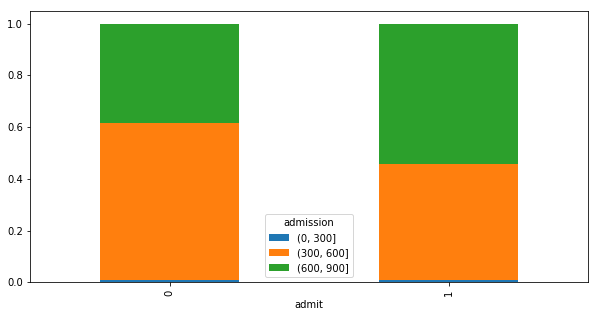

In [12]:
admitted_chart.div(admitted_chart.sum(1).astype(int), axis=0).plot.bar(figsize=(10,5), stacked=True)


In [13]:
bins=[0.0, 2.5, 3.5, 5]

In [14]:
df2['admin']= pd.cut(df2.gpa, bins, right=True)

In [15]:
admitted= pd.crosstab(df2['admin'],df2['admission'])

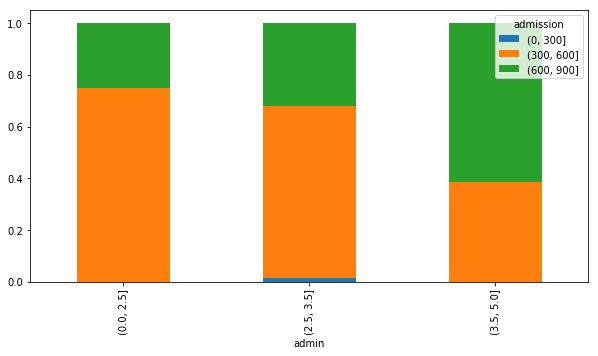

In [16]:
admitted.div(admitted.sum(1).astype(int), axis=0).plot.bar(figsize=(10,5), stacked=True)

In [17]:
admitt= pd.crosstab(df2['admin'],df2['admit'])

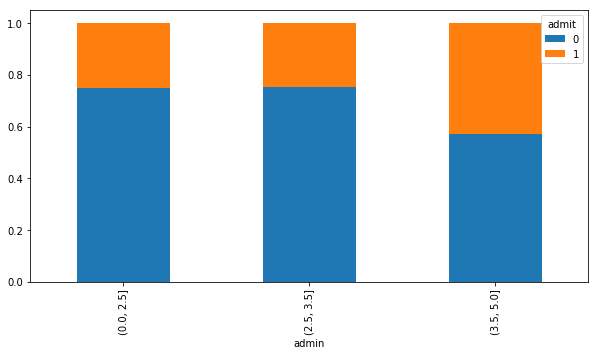

In [18]:
admitt.div(admitt.sum(1).astype(int), axis=0).plot.bar(figsize=(10,5), stacked=True)

In [19]:
df2['gpa']= df2['gpa'].astype(int)

In [20]:
df2.gpa.dtypes

dtype('int32')

In [21]:
df_cluster= df2[['gpa','gre']].copy(deep=True)

In [22]:
from sklearn.preprocessing import scale

In [23]:
data=scale(df_cluster)

In [24]:
model = KMeans(init='k-means++', n_clusters=2, n_init=20).fit(data)

In [25]:
pd.value_counts(model.labels_, sort=True)

0    233
1    167
dtype: int64

In [26]:
pd.value_counts(df2['admit'], normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [27]:
model.predict(data)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [28]:
df2['admit'].head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [29]:
test =pd.read_csv("C:\\Users\\Hotelsng\\Downloads\\test_gpa.csv")

In [30]:
test.tail()

,gre,gpa,admit
395,620,4.00,1
396,560,3.04,1
397,460,2.63,1
398,700,3.65,1
399,600,3.89,1


In [31]:
tst_data= scale(test)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X= df.drop('admit', axis=1)
y= df['admit']

In [34]:
# X=pd.DataFrame(x, columns=X.columns)

In [35]:
standardScalerX = StandardScaler()


In [36]:
df2.drop('admission', axis=1)
df2.drop('admin',axis=1)


,admit,gre,gpa,rank_2,rank_3,rank_4,admission
0,0,380,3,0,1,0,"(300, 600]"
1,1,660,3,0,1,0,"(600, 900]"
2,1,800,4,0,0,0,"(600, 900]"
3,1,640,3,0,0,1,"(600, 900]"
4,0,520,2,0,0,1,"(300, 600]"
5,1,760,3,1,0,0,"(600, 900]"
6,1,560,2,0,0,0,"(300, 600]"
7,0,400,3,1,0,0,"(300, 600]"
8,1,540,3,0,1,0,"(300, 600]"
9,0,700,3,1,0,0,"(600, 900]"


In [37]:
df2['gpa']= df2['gpa'].astype(int)
scale_x= standardScalerX.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print(y_pred)
acc_score= accuracy_score(y_pred, y_test)
print(acc_score)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 1 0 0 0]
0.625


In [41]:
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
  #  print(y_pred)
    score= accuracy_score(y_pred,y_test)
    print(i,score)

1 0.6666666666666666
2 0.6833333333333333
3 0.6333333333333333
4 0.625
5 0.6166666666666667
6 0.5916666666666667
7 0.575
8 0.6083333333333333
9 0.6
10 0.6166666666666667
11 0.6083333333333333
12 0.675
13 0.675
14 0.6916666666666667
15 0.6666666666666666
16 0.7
17 0.6583333333333333
18 0.6583333333333333
19 0.6666666666666666
20 0.6833333333333333
21 0.7
22 0.6916666666666667
23 0.6833333333333333
24 0.675
25 0.675
26 0.675
27 0.675
28 0.675
29 0.675
30 0.675
31 0.675
32 0.675
33 0.675
34 0.675
35 0.675
36 0.675
37 0.675
38 0.675
39 0.675


In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform')

In [43]:
y_pred = knn.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


SyntaxError: invalid syntax (<ipython-input-44-9bacd0769f04>, line 1)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier(n_estimators=10)

In [47]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_predict = clf.predict(X_test)
print(y_predict)

[0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1]


In [49]:
accuracy_score(y_test, y_predict)

0.6916666666666667

In [50]:
clf_test= RandomForestClassifier(n_estimators=i)

In [ ]:
for i in range(1,100):
    clf_test.fit(X_train, y_train)
    y_pred2=(clf_test.predict(X_test))
    sco= accuracy_score(y_test, y_predict)
    print(i, sco)

In [51]:
#to test the importance of each feature
feature_importance=pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=True)

In [52]:
feature_importance

rank_4    0.029708
rank_2    0.042644
rank_3    0.053408
gre       0.365712
gpa       0.508527
dtype: float64

In [53]:
%matplotlib inline

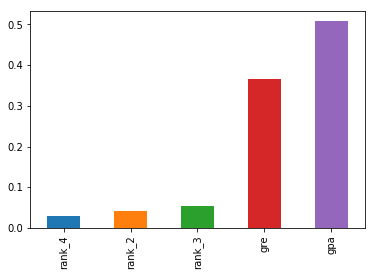

In [54]:
feature_importance.plot.bar()

In [55]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
x_pred=LogReg.predict(X_test)

In [64]:
accuracy_score(y_test, x_pred)

0.6916666666666667

In [65]:
x_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)